In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
sns.set_style('darkgrid')
plt.rcParams['figure.figsize'] = (20, 6)

In [3]:
survey = pd.read_csv('python_psf_external_18.csv')
survey = survey.drop('Unnamed: 0', axis=1)
survey.columns = [c.lower() for c in survey.columns]

C:\Users\secsi\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (168,197) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
survey.shape

(19835, 283)

In [5]:
survey.sample()

,is python the main language you use for your current projects?,none:what other language(s) do you use?,java:what other language(s) do you use?,javascript:what other language(s) do you use?,c/c++:what other language(s) do you use?,php:what other language(s) do you use?,c#:what other language(s) do you use?,ruby:what other language(s) do you use?,bash / shell:what other language(s) do you use?,objective-c:what other language(s) do you use?,...,technical support:which of the following best describes your job role(s)?,data analyst:which of the following best describes your job role(s)?,business analyst:which of the following best describes your job role(s)?,team lead:which of the following best describes your job role(s)?,product manager:which of the following best describes your job role(s)?,cio / ceo / cto:which of the following best describes your job role(s)?,systems analyst:which of the following best describes your job role(s)?,other write in::which of the following best describes your job role(s)?,could you tell us your age range?,what country do you live in?
4964,Yes,NaN,Java,NaN,C/C++,NaN,NaN,NaN,Bash / Shell,NaN,...,NaN,NaN,NaN,Team lead,NaN,NaN,NaN,NaN,30–39,India


In [6]:
survey.columns

Index(['is python the main language you use for your current projects?',
       'none:what other language(s) do you use?',
       'java:what other language(s) do you use?',
       'javascript:what other language(s) do you use?',
       'c/c++:what other language(s) do you use?',
       'php:what other language(s) do you use?',
       'c#:what other language(s) do you use?',
       'ruby:what other language(s) do you use?',
       'bash / shell:what other language(s) do you use?',
       'objective-c:what other language(s) do you use?',
       ...
       'technical support:which of the following best describes your job role(s)?',
       'data analyst:which of the following best describes your job role(s)?',
       'business analyst:which of the following best describes your job role(s)?',
       'team lead:which of the following best describes your job role(s)?',
       'product manager:which of the following best describes your job role(s)?',
       'cio / ceo / cto:which of the follow

In [7]:
def find_cols(kws, df=survey):
    '''找到 df 中含有 kws 的列'''
    return [item for item in df.columns if all([w in item for w in kws])]

In [8]:
find_cols(df=survey, kws=['python', 'version'])

['which version of python do you use the most?',
 'which version of python 2 do you use the most?',
 'which version of python 3 do you use the most?',
 'i dont update:what do you typically use to upgrade your python version?',
 'somebody else manages python updates for me:what do you typically use to upgrade your python version?',
 'python.org:what do you typically use to upgrade your python version?',
 'build from source:what do you typically use to upgrade your python version?',
 'automatic upgrade via cloud provider:what do you typically use to upgrade your python version?',
 'enthought:what do you typically use to upgrade your python version?',
 'anaconda:what do you typically use to upgrade your python version?',
 'activepython:what do you typically use to upgrade your python version?',
 'intel distribution for python:what do you typically use to upgrade your python version?',
 'os-provided python (via apt-get, yum, homebrew, etc.):what do you typically use to upgrade your python 

## 2018 年的问题

- 使用 Python 2 和 Python 3 的开发者的比例？
- 做数据分析和机器学习的人中分别有多少人使用的是 Python 3？
- 常用框架中使用 Python 2 和 Python 3 的比例？
- 做数据分析和机器学习的人常用的框架？
- 公司规模大小和是否使用 Python 3 的关系？
- 开发者年龄和是否使用 Python 3 的关系？
- 使用 Python 3 和 Python 2 的开发者的国别分布？
- 开发者中使用 IDE 的情况？

### 使用 Python 2 和 Python 3 的开发者比例

In [9]:
python_version = survey['which version of python do you use the most?']
python_version.describe()

count        18431
unique           2
top       Python 3
freq         15446
Name: which version of python do you use the most?, dtype: object

In [10]:
python_version.value_counts(normalize=True, dropna=False)

Python 3    0.778724
Python 2    0.150492
NaN         0.070784
Name: which version of python do you use the most?, dtype: float64

In [11]:
python_version.value_counts(normalize=True, dropna=True)

Python 3    0.838045
Python 2    0.161955
Name: which version of python do you use the most?, dtype: float64

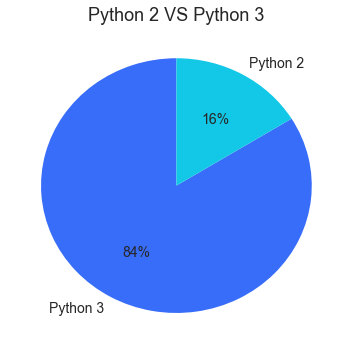

In [12]:
python_version.value_counts(normalize=True, dropna=True).plot(
    kind="pie",
    figsize=(5, 5),
    startangle=90,
    autopct="%.0f%%",
    fontsize=14,
    colors=sns.color_palette("rainbow")[:2],
)
plt.title("Python 2 VS Python 3", fontsize=18)
plt.ylabel("")
plt.tight_layout()
plt.savefig("python-version.png")

Python 3 的比重已经达到了 84% ！去年还是才 75%。

### 做数据分析和机器学习的人中分别有多少人使用的是 Python 3

In [13]:
find_cols(['machine learning'])

['machine learning:what do you use python for?',
 'machine learning:to what extent are you involvedin the following activities?']

In [14]:
find_cols(['data analysis'])

['data analysis:what do you use python for?',
 'data analysis:to what extent are you involvedin the following activities?']

In [15]:
version_col = 'which version of python do you use the most?'

In [16]:
python_da_ml = survey[
    [
        version_col,
        "machine learning:what do you use python for?",
        "data analysis:what do you use python for?",
    ]
]

In [17]:
python_da_ml.head()

,which version of python do you use the most?,machine learning:what do you use python for?,data analysis:what do you use python for?
0,NaN,NaN,NaN
1,NaN,NaN,NaN
2,NaN,NaN,NaN
3,NaN,NaN,NaN
4,NaN,NaN,NaN


In [18]:
python_da = pd.crosstab(
    python_da_ml[version_col],
    python_da_ml["data analysis:what do you use python for?"],
    normalize=True,
)

In [19]:
python_da

data analysis:what do you use python for?,Data analysis
which version of python do you use the most?,
Python 2,0.140556
Python 3,0.859444


In [20]:
python_ml = pd.crosstab(
    python_da_ml[version_col],
    python_da_ml["machine learning:what do you use python for?"],
    normalize=True,
)

In [21]:
python_ml

machine learning:what do you use python for?,Machine learning
which version of python do you use the most?,
Python 2,0.109697
Python 3,0.890303


In [22]:
pd.crosstab(
    python_da_ml[version_col],
    columns=[python_da_ml["machine learning:what do you use python for?"], python_da_ml["data analysis:what do you use python for?"]],
    normalize=True,
)

machine learning:what do you use python for?,Machine learning
data analysis:what do you use python for?,Data analysis
which version of python do you use the most?,
Python 2,0.103596
Python 3,0.896404


In [23]:
pd.concat([python_da, python_ml], axis=1)

,Data analysis,Machine learning
which version of python do you use the most?,,
Python 2,0.140556,0.109697
Python 3,0.859444,0.890303


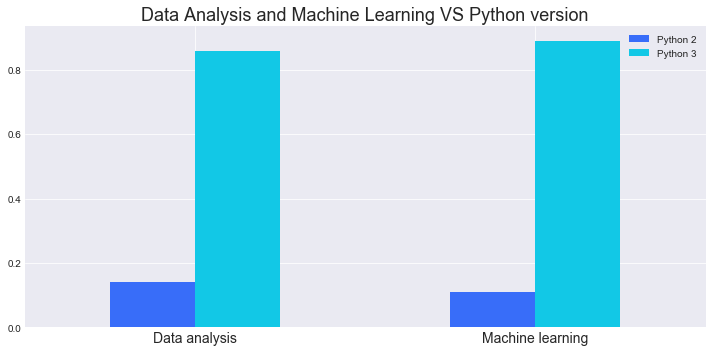

In [24]:
pd.concat([python_da, python_ml], axis=1).T.plot(kind='bar', figsize=(10, 5), color=sns.color_palette('rainbow'))
plt.xticks(rotation=0, fontsize=14)
plt.title('Data Analysis and Machine Learning VS Python version', fontsize=18)
plt.legend(title=None)
plt.tight_layout()
plt.savefig('data-analysis-machine-learning-vs-python-version.png')

这两类人群中使用 Python 的比例相比去年都有来了很大的提高，其中数据分析更是达到了 10%。

### 常用框架中使用 Python 2 和 Python 3 的比例？

In [43]:
cols = find_cols(['what', 'framework', 'use', 'python'])
cols = [c for c in cols if not c.startswith('none:') and not c.startswith('other')]

In [44]:
frameworks = survey[cols]
frameworks.head()

,django:what web frameworks / libraries do you use in addition to python?,turbogears:what web frameworks / libraries do you use in addition to python?,web2py:what web frameworks / libraries do you use in addition to python?,bottle:what web frameworks / libraries do you use in addition to python?,cherrypy:what web frameworks / libraries do you use in addition to python?,flask:what web frameworks / libraries do you use in addition to python?,hug:what web frameworks / libraries do you use in addition to python?,pyramid:what web frameworks / libraries do you use in addition to python?,tornado:what web frameworks / libraries do you use in addition to python?,falcon:what web frameworks / libraries do you use in addition to python?,...,scipy:what data science framework(s) do you use in addition to python?,pandas:what data science framework(s) do you use in addition to python?,matplotlib:what data science framework(s) do you use in addition to python?,seaborn:what data science framework(s) do you use in addition to python?,scikit-learn:what data science framework(s) do you use in addition to python?,keras:what data science framework(s) do you use in addition to python?,tensorflow:what data science framework(s) do you use in addition to python?,theano:what data science framework(s) do you use in addition to python?,nltk:what data science framework(s) do you use in addition to python?,gensim:what data science framework(s) do you use in addition to python?
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


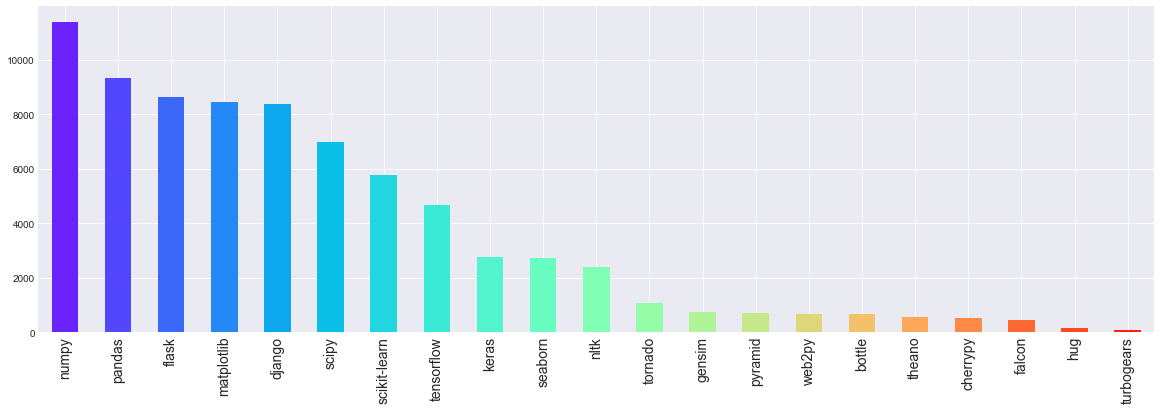

In [45]:
count_df = frameworks.count().sort_values(ascending=False)
count_df.index = [item.split(':')[0] for item in count_df.index]

count_df.plot(kind='bar', color=sns.color_palette('rainbow', frameworks.shape[1]))
plt.xticks(fontsize=14);

In [46]:
frameworks.count().sort_values(ascending=False)

numpy:what data science framework(s) do you use in addition to python?           11384
pandas:what data science framework(s) do you use in addition to python?           9314
flask:what web frameworks / libraries do you use in addition to python?           8615
matplotlib:what data science framework(s) do you use in addition to python?       8434
django:what web frameworks / libraries do you use in addition to python?          8354
scipy:what data science framework(s) do you use in addition to python?            6989
scikit-learn:what data science framework(s) do you use in addition to python?     5787
tensorflow:what data science framework(s) do you use in addition to python?       4653
keras:what data science framework(s) do you use in addition to python?            2776
seaborn:what data science framework(s) do you use in addition to python?          2713
nltk:what data science framework(s) do you use in addition to python?             2413
tornado:what web frameworks / libraries do 

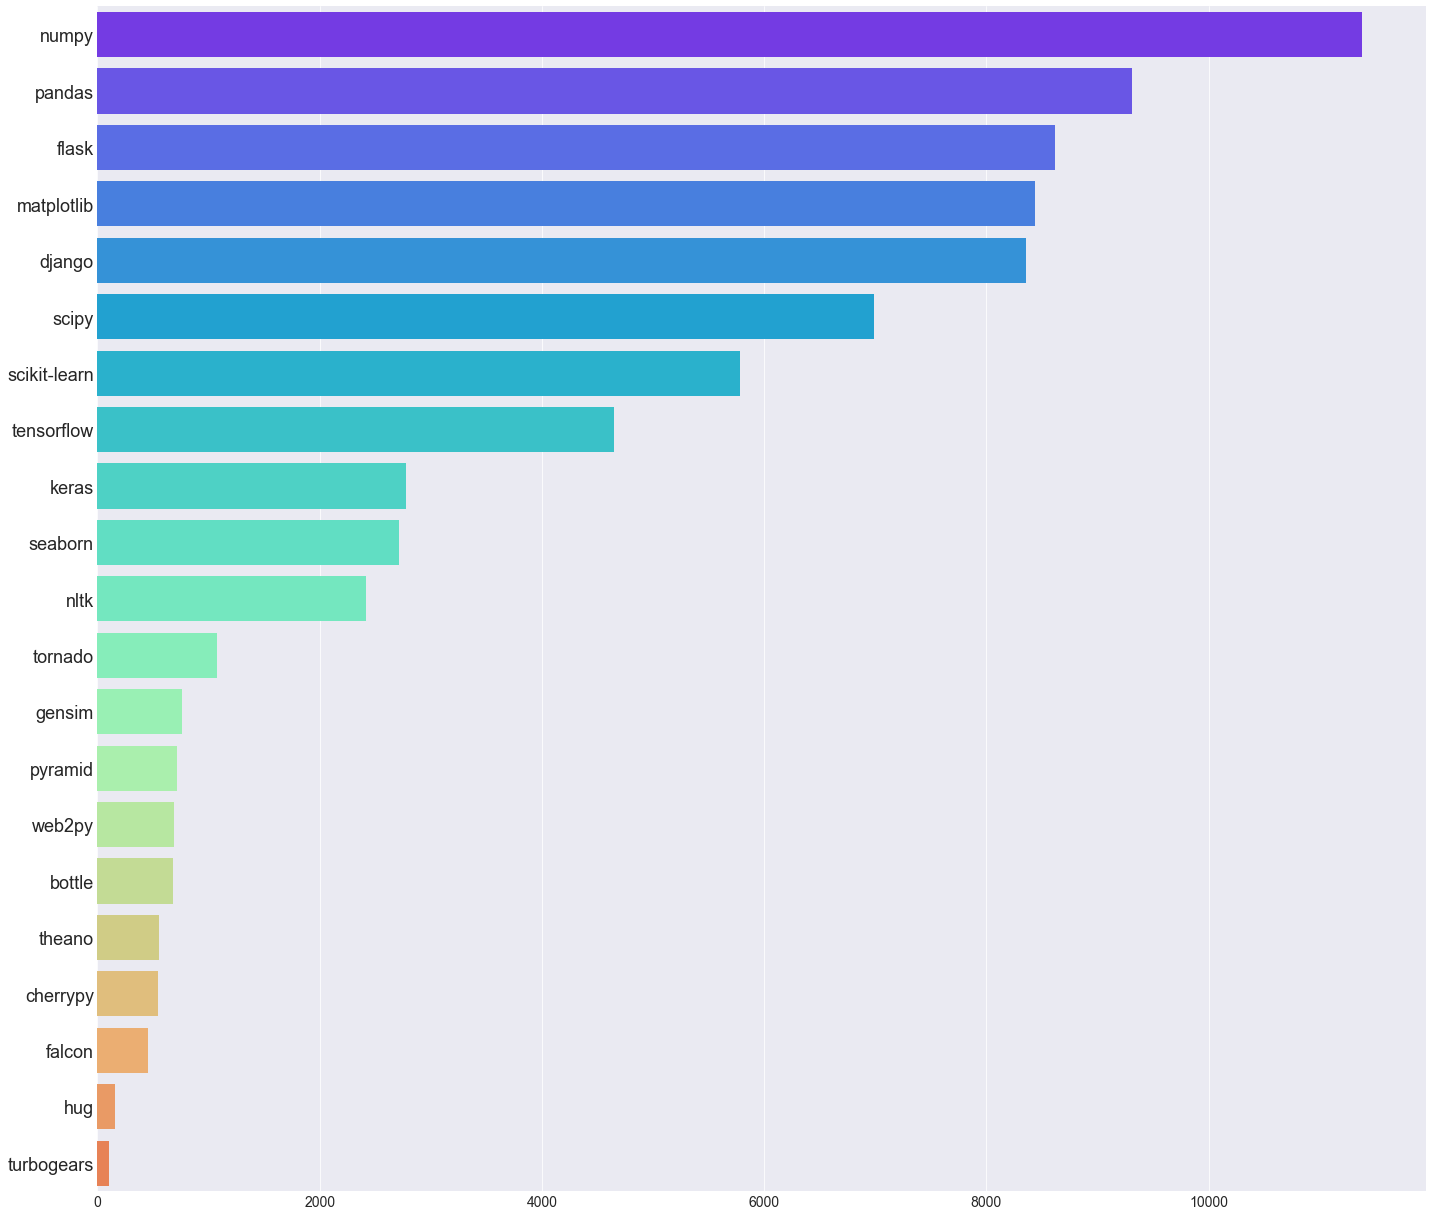

In [47]:
values = frameworks.count().sort_values(ascending=False).values
labels = [item.split(':')[0] for item in frameworks.count().sort_values(ascending=False).index]

plt.figure(figsize=(20, 17))
sns.barplot(x=values, y=labels, orient='h', palette=sns.color_palette("rainbow", 24))
plt.xticks(fontsize=14)
plt.yticks(fontsize=18)
plt.tight_layout()
plt.savefig('frameworks.png')

In [48]:
pd.crosstab(index=python_version, columns=frameworks.iloc[:, 0])

django:what web frameworks / libraries do you use in addition to python?,Django
which version of python do you use the most?,
Python 2,1293
Python 3,7061


In [49]:
frameworks_pyver = frameworks.apply(lambda col: pd.crosstab(index=python_version, columns=col).iloc[:, 0])
frameworks_pyver.columns = [item.split(':')[0] for item in frameworks.columns]
frameworks_pyver

,django,turbogears,web2py,bottle,cherrypy,flask,hug,pyramid,tornado,falcon,...,scipy,pandas,matplotlib,seaborn,scikit-learn,keras,tensorflow,theano,nltk,gensim
which version of python do you use the most?,,,,,,,,,,,,,,,,,,,,,
Python 2,1293,26,136,118,138,1296,14,129,211,58,...,883,1219,1031,233,628,236,498,67,285,59
Python 3,7061,79,557,566,405,7319,145,591,869,398,...,6106,8095,7403,2480,5159,2540,4155,490,2128,701


In [50]:
frameworks_pyver_ratio = frameworks_pyver / frameworks_pyver.sum(axis=0)

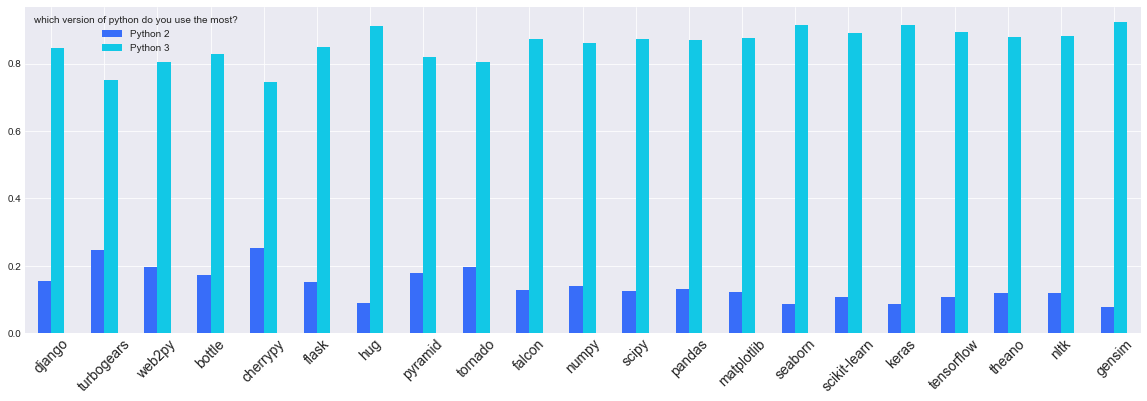

In [52]:
frameworks_pyver_ratio.T.plot(kind='bar', color=sns.color_palette('rainbow'))
plt.xticks(rotation=45, fontsize=14);

In [56]:
df = frameworks_pyver_ratio.stack().reset_index()
df.columns=['pyver', 'framework', 'value']
df.head()

,pyver,framework,value
0,Python 2,django,0.154776
1,Python 2,turbogears,0.247619
2,Python 2,web2py,0.196248
3,Python 2,bottle,0.172515
4,Python 2,cherrypy,0.254144


C:\Users\secsi\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


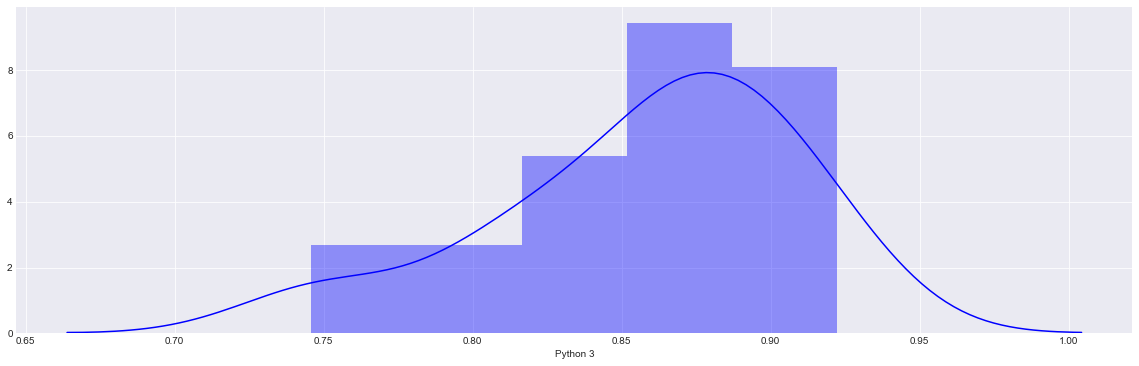

In [58]:
sns.distplot(frameworks_pyver_ratio.iloc[1, :], bins=5, color='b')

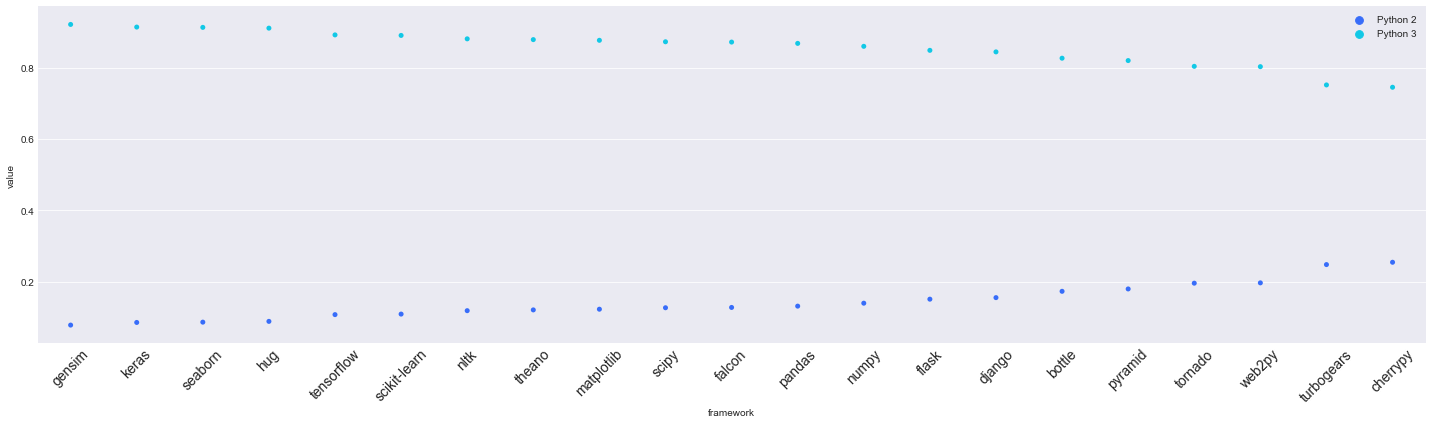

In [63]:
sns.stripplot(x='framework', y='value', hue='pyver', data=df, size=5, palette=sns.color_palette('rainbow'), order=frameworks_pyver_ratio.T['Python 3'].sort_values(ascending=False).index)
plt.xticks(rotation=45, fontsize=14);
plt.legend(title=None)
plt.tight_layout()
plt.savefig('frameworks-python-version.png')

### 做数据分析和机器学习的人常用的框架？

In [65]:
cols = find_cols(['use', 'python', 'most'])
cols

['what do you use python for the most?',
 'which version of python do you use the most?',
 'which version of python 2 do you use the most?',
 'which version of python 3 do you use the most?']

In [67]:
uses = survey['what do you use python for the most?']
uses.head()

0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
Name: what do you use python for the most?, dtype: object

In [68]:
frameworks_uses = frameworks.apply(lambda col: pd.crosstab(index=uses, columns=col).iloc[:, 0])
frameworks_uses.columns = [item.split(':')[0] for item in frameworks_uses.columns]
frameworks_uses.head()

,django,turbogears,web2py,bottle,cherrypy,flask,hug,pyramid,tornado,falcon,...,scipy,pandas,matplotlib,seaborn,scikit-learn,keras,tensorflow,theano,nltk,gensim
Computer graphics,18,NaN,5,3,1,24,NaN,3,7.0,2,...,40,28,47,7,19,8,23,3,5,3.0
Data analysis,940,11.0,98,101,66,1309,23.0,93,151.0,58,...,1804,2264,2070,1006,1637,634,969,126,575,218.0
Desktop development,256,2.0,24,34,20,270,5.0,19,36.0,15,...,216,260,292,47,113,43,100,7,44,6.0
DevOps / System administration / Writing automation scripts,723,4.0,51,84,69,1008,21.0,71,112.0,55,...,481,756,637,123,321,120,292,25,137,20.0
Educational purposes,449,15.0,83,30,26,375,9.0,40,32.0,18,...,424,482,554,108,297,131,283,36,107,24.0


In [69]:
da_ml_frameworks_uses = frameworks_uses.loc[['Data analysis', 'Machine learning']]
da_ml_frameworks_uses.head()

,django,turbogears,web2py,bottle,cherrypy,flask,hug,pyramid,tornado,falcon,...,scipy,pandas,matplotlib,seaborn,scikit-learn,keras,tensorflow,theano,nltk,gensim
Data analysis,940,11.0,98,101,66,1309,23.0,93,151.0,58,...,1804,2264,2070,1006,1637,634,969,126,575,218.0
Machine learning,674,7.0,94,40,40,917,13.0,34,87.0,47,...,1311,1449,1445,723,1406,1013,1317,199,650,297.0


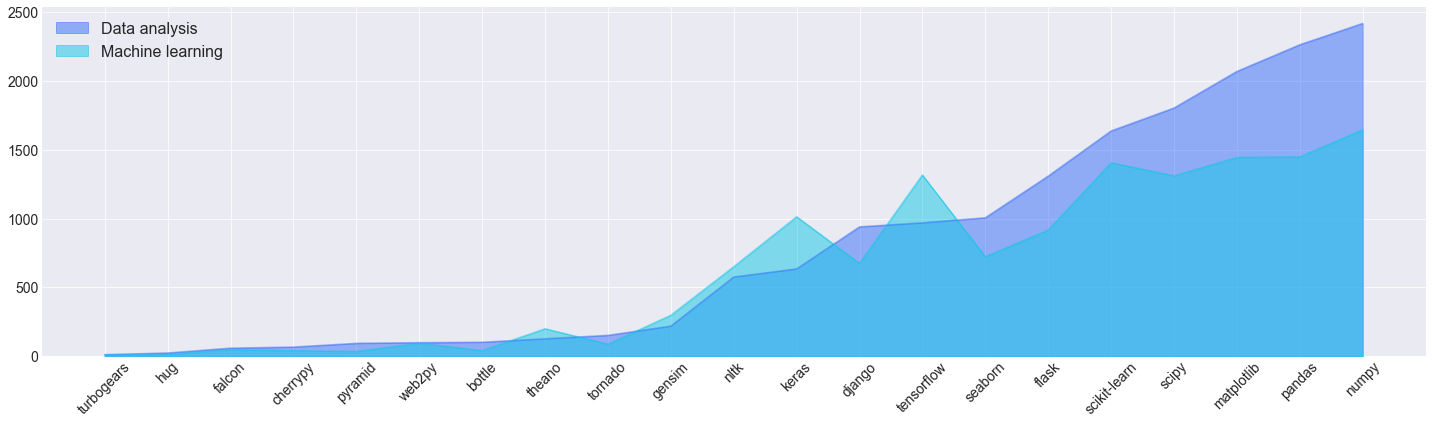

In [74]:
da_ml_frameworks_uses.T.sort_values(by='Data analysis').plot.area(stacked=False, alpha=0.5, figsize=(20, 6), 
                                                                  color=sns.color_palette('rainbow')[:2])
plt.xticks(range(da_ml_frameworks_uses.shape[1]), 
           da_ml_frameworks_uses.T.sort_values(by='Data analysis').index, 
           rotation=45, fontsize=14);
plt.yticks(fontsize=14)
plt.legend(fontsize=16)
plt.tight_layout()
plt.savefig('frameworks-data-analysis-machine-learning.png')

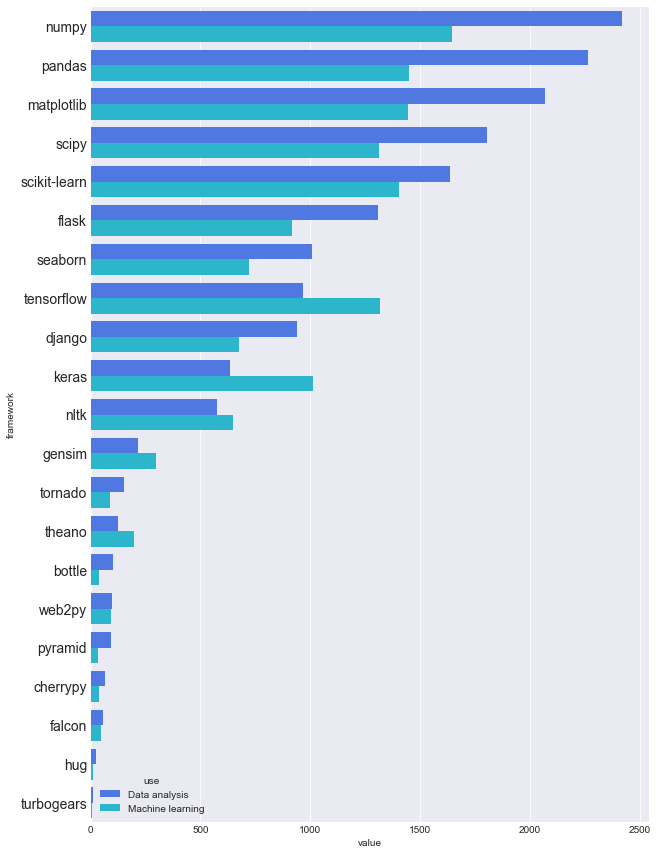

In [76]:
plt.figure(figsize=(10, 15))
df = da_ml_frameworks_uses.stack().reset_index()
df.columns = ['use', 'framework', 'value']
sns.barplot(x='value', y='framework', hue='use', 
            data=df, 
            orient='h', 
            order=da_ml_frameworks_uses.T.sort_values(by='Data analysis', ascending=False).index,
            palette=sns.color_palette('rainbow'))
plt.yticks(fontsize=14);

### 公司规模大小和是否使用 Python 3 的关系？

In [78]:
cols = find_cols(['how', 'many', 'people', 'project'])
cols

['how many people are in your project team?']

In [79]:
team_scale = survey[cols[0]]
team_scale.head()

0    More than 40 people
1            8-12 people
2                    NaN
3           13-20 people
4             2-7 people
Name: how many people are in your project team?, dtype: object

In [80]:
team_scale.describe()

count           8668
unique             5
top       2-7 people
freq            6382
Name: how many people are in your project team?, dtype: object

In [81]:
team_scale.isnull().sum()

11167

In [83]:
team_pyver = pd.crosstab(team_scale, python_version)
team_pyver = team_pyver.reindex(['2-7 people', '8-12 people', '13-20 people', '21-40 people', 'More than 40 people'])
team_pyver

which version of python do you use the most?,Python 2,Python 3
how many people are in your project team?,,
2-7 people,1243,4793
8-12 people,334,1036
13-20 people,106,323
21-40 people,36,122
More than 40 people,41,85


In [84]:
team_pyver_sorted = team_pyver.div(team_pyver.sum(axis=1), axis=0).sort_values(by='Python 3', ascending=False)
team_pyver_sorted

which version of python do you use the most?,Python 2,Python 3
how many people are in your project team?,,
2-7 people,0.205931,0.794069
21-40 people,0.227848,0.772152
8-12 people,0.243796,0.756204
13-20 people,0.247086,0.752914
More than 40 people,0.325397,0.674603


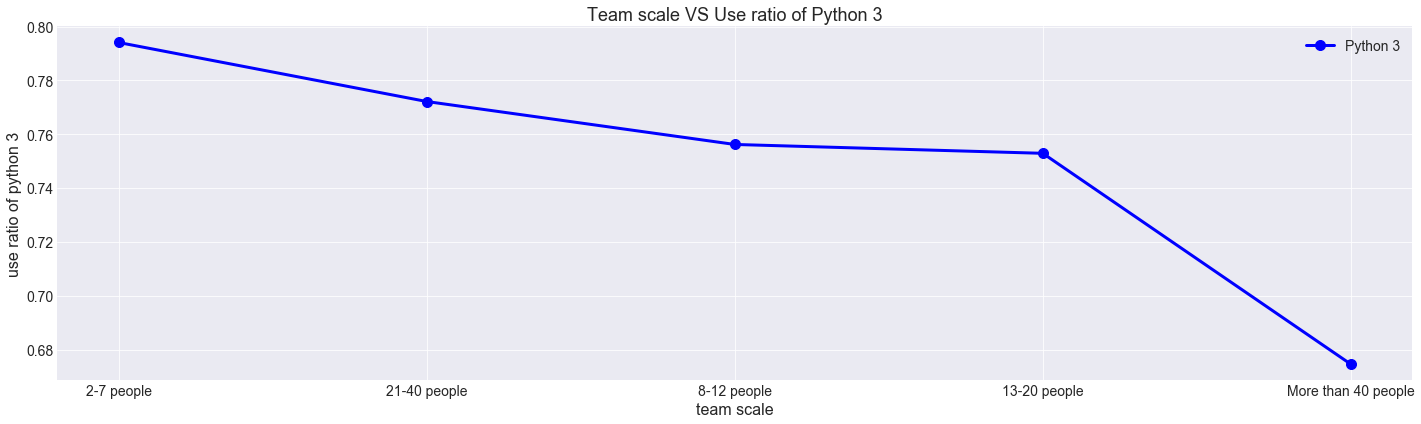

In [85]:
team_pyver_sorted['Python 3'].plot(label='Python 3', marker='o', markersize=10, color='b', linewidth=3)
plt.xticks(range(5), team_pyver_sorted.index, fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('team scale', fontsize=16)
plt.ylabel('use ratio of python 3', fontsize=16)
plt.legend(fontsize=14)
plt.title('Team scale VS Use ratio of Python 3', fontsize=18)
plt.tight_layout()
plt.savefig('team-scale-python-3.png')

### 开发者年龄和是否使用 Python 3 的关系？

In [87]:
cols = find_cols(['age', 'range'])
cols

['could you tell us your age range?']

In [88]:
age = survey[cols[0]]
age.head()

0    50–59
1    30–39
2    50–59
3    30–39
4    21–29
Name: could you tell us your age range?, dtype: object

In [89]:
age.describe()

count     19835
unique        7
top       21–29
freq       7650
Name: could you tell us your age range?, dtype: object

In [90]:
age.isnull().sum()

0

In [91]:
age.unique()

array(['50–59', '30–39', '21–29', '18–20', '40–49', '60 or older',
       '17 or younger'], dtype=object)

In [92]:
age.value_counts()

21–29            7650
30–39            6022
40–49            2344
18–20            1510
17 or younger    1103
50–59             862
60 or older       344
Name: could you tell us your age range?, dtype: int64

In [94]:
age_pyver = pd.crosstab(index=age, columns=python_version)
age_pyver

which version of python do you use the most?,Python 2,Python 3
could you tell us your age range?,,
17 or younger,85,819
18–20,101,1244
21–29,1013,6153
30–39,1109,4592
40–49,451,1768
50–59,163,627
60 or older,63,243


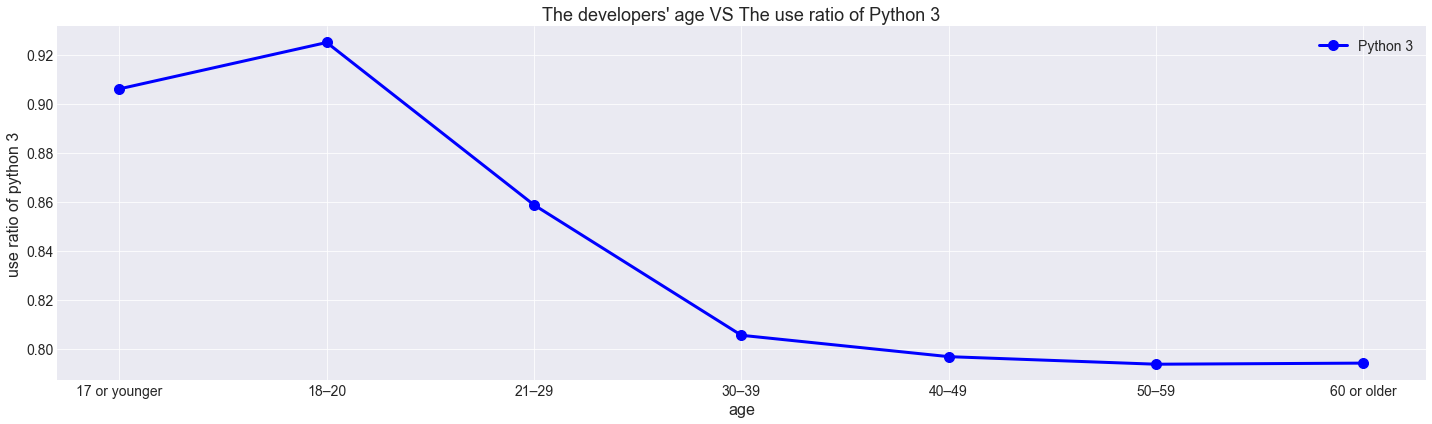

In [95]:
age_pyver.div(age_pyver.sum(axis=1), axis=0)['Python 3'].plot(label='Python 3',
                                                              marker='o', 
                                                              markersize=10, 
                                                              color='b', 
                                                              linewidth=3)
plt.xticks(range(age_pyver.shape[0]), age_pyver.index, fontsize=14);
plt.yticks(fontsize=14)
plt.xlabel('age', fontsize=16)
plt.ylabel('use ratio of python 3', fontsize=16)
plt.legend(fontsize=14)
plt.title("The developers' age VS The use ratio of Python 3", fontsize=18)
plt.tight_layout()
plt.savefig('age-python-3.png')

In [98]:
china = survey.loc[survey['what country do you live in?'] == 'China']
usa = survey.loc[survey['what country do you live in?'] == 'United States']
china.head()

,is python the main language you use for your current projects?,none:what other language(s) do you use?,java:what other language(s) do you use?,javascript:what other language(s) do you use?,c/c++:what other language(s) do you use?,php:what other language(s) do you use?,c#:what other language(s) do you use?,ruby:what other language(s) do you use?,bash / shell:what other language(s) do you use?,objective-c:what other language(s) do you use?,...,technical support:which of the following best describes your job role(s)?,data analyst:which of the following best describes your job role(s)?,business analyst:which of the following best describes your job role(s)?,team lead:which of the following best describes your job role(s)?,product manager:which of the following best describes your job role(s)?,cio / ceo / cto:which of the following best describes your job role(s)?,systems analyst:which of the following best describes your job role(s)?,other write in::which of the following best describes your job role(s)?,could you tell us your age range?,what country do you live in?
179,"No, I don’t use Python for my current projects",NaN,NaN,NaN,C/C++,NaN,NaN,NaN,NaN,NaN,...,Technical support,NaN,NaN,NaN,Product manager,NaN,NaN,NaN,30–39,China
181,"No, I don’t use Python for my current projects",None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17 or younger,China
189,"No, I don’t use Python for my current projects",NaN,NaN,NaN,NaN,NaN,C#,NaN,NaN,NaN,...,NaN,NaN,NaN,Team lead,NaN,NaN,NaN,NaN,30–39,China
210,"No, I don’t use Python for my current projects",NaN,Java,NaN,C/C++,PHP,C#,NaN,NaN,NaN,...,NaN,NaN,Business analyst,NaN,NaN,NaN,NaN,NaN,18–20,China
211,"No, I don’t use Python for my current projects",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18–20,China


In [100]:
country_age = pd.crosstab([survey['what country do you live in?'], survey['which version of python do you use the most?']], survey['could you tell us your age range?'])
country_age.index.names = ['country', 'pyver']
country_age.head()

could you tell us your age range?  17 or younger  18–20  21–29  30–39  40–49  \
country     pyver                                                              
Afghanistan Python 2                           0      0      0      3      1   
            Python 3                           0      2      2      3      1   
Albania     Python 2                           0      0      0      0      0   
            Python 3                           1      0      4      4      1   
Algeria     Python 2                           0      0      1      2      0   

could you tell us your age range?  50–59  60 or older  
country     pyver                                      
Afghanistan Python 2                   0            0  
            Python 3                   0            1  
Albania     Python 2                   0            1  
            Python 3                   1            0  
Algeria     Python 2                   0            0

In [101]:
country_age_total = country_age.sum(level=0)
country_age_total.head()

could you tell us your age range?,17 or younger,18–20,21–29,30–39,40–49,50–59,60 or older
country,,,,,,,
Afghanistan,0,2,2,6,2,0,1
Albania,1,0,4,4,1,1,1
Algeria,2,0,15,14,2,1,0
Andorra,2,1,3,2,0,0,0
Angola,0,1,1,1,0,0,0


In [102]:
country_age_total['60 or older'].sum()

306

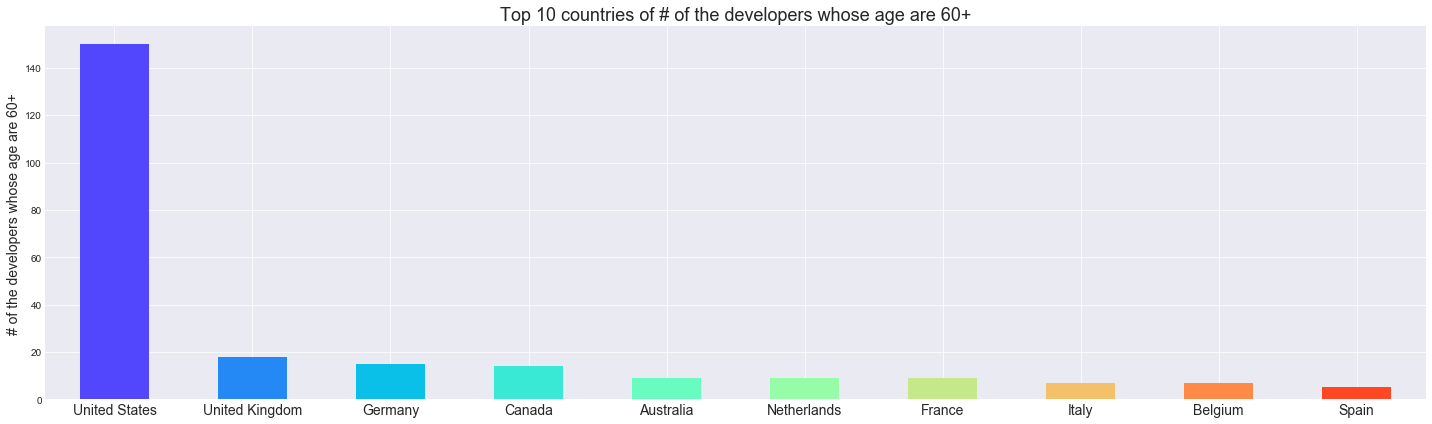

In [103]:
country_age_total['60 or older'].sort_values(ascending=False)[:10].plot(kind='bar', color=sns.color_palette('rainbow', 10))
plt.xticks(fontsize=14, rotation=0)
plt.xlabel('')
plt.ylabel('# of the developers whose age are 60+', fontsize=14)
plt.title('Top 10 countries of # of the developers whose age are 60+', fontsize=18)
plt.tight_layout()
plt.savefig('top10-60-or-older.png')

In [104]:
three_countries = country_age_total.loc[['United States', 'India', 'China']]
three_countries

could you tell us your age range?,17 or younger,18–20,21–29,30–39,40–49,50–59,60 or older
country,,,,,,,
United States,171,159,1122,1363,677,295,150
India,123,441,1289,286,59,14,3
China,24,48,462,152,31,3,2


In [105]:
three_countries_ratio = three_countries.div(three_countries.sum(axis=1), axis=0)
three_countries_ratio

could you tell us your age range?,17 or younger,18–20,21–29,30–39,40–49,50–59,60 or older
country,,,,,,,
United States,0.043434,0.040386,0.284989,0.346203,0.171958,0.074930,0.038100
India,0.055530,0.199097,0.581941,0.129120,0.026637,0.006321,0.001354
China,0.033241,0.066482,0.639889,0.210526,0.042936,0.004155,0.002770


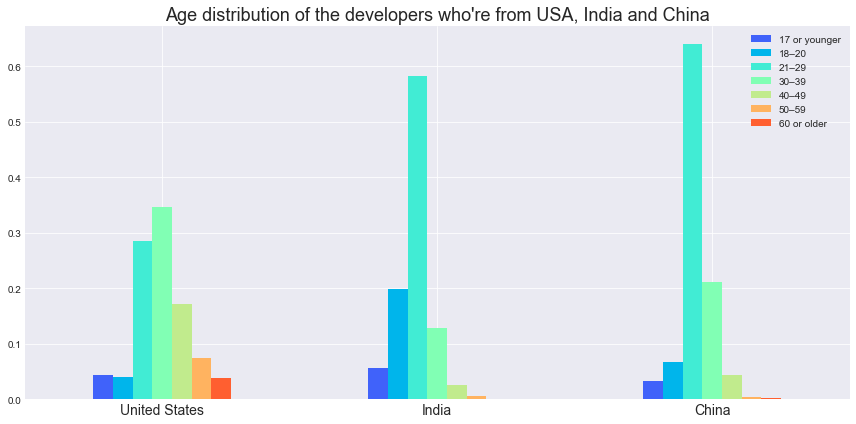

In [106]:
three_countries_ratio.plot(kind='bar', figsize=(12, 6), color=sns.color_palette('rainbow', 7))
plt.xticks(range(3), ['United States', 'India', 'China'], rotation=0, fontsize=14);
plt.xlabel('')
plt.legend(title=None)
plt.title("Age distribution of the developers who're from USA, India and China", fontsize=18);
plt.tight_layout()
plt.savefig('age-distribution.png')

In [107]:
country_age.loc['United States']

could you tell us your age range?,17 or younger,18–20,21–29,30–39,40–49,50–59,60 or older
pyver,,,,,,,
Python 2,12,17,189,267,148,67,33
Python 3,159,142,933,1096,529,228,117


### 使用 Python 3 和 Python 2 的开发者的国别分布？

In [109]:
cols = find_cols(['country', 'live'])
cols

['what country do you live in?']

In [110]:
countries = survey[cols[0]]
countries.head()

0    Antigua and Barbuda
1                  Italy
2          United States
3         United Kingdom
4          United States
Name: what country do you live in?, dtype: object

In [111]:
countries.describe()

count             19835
unique              160
top       United States
freq               4116
Name: what country do you live in?, dtype: object

In [112]:
countries.isnull().sum()

0

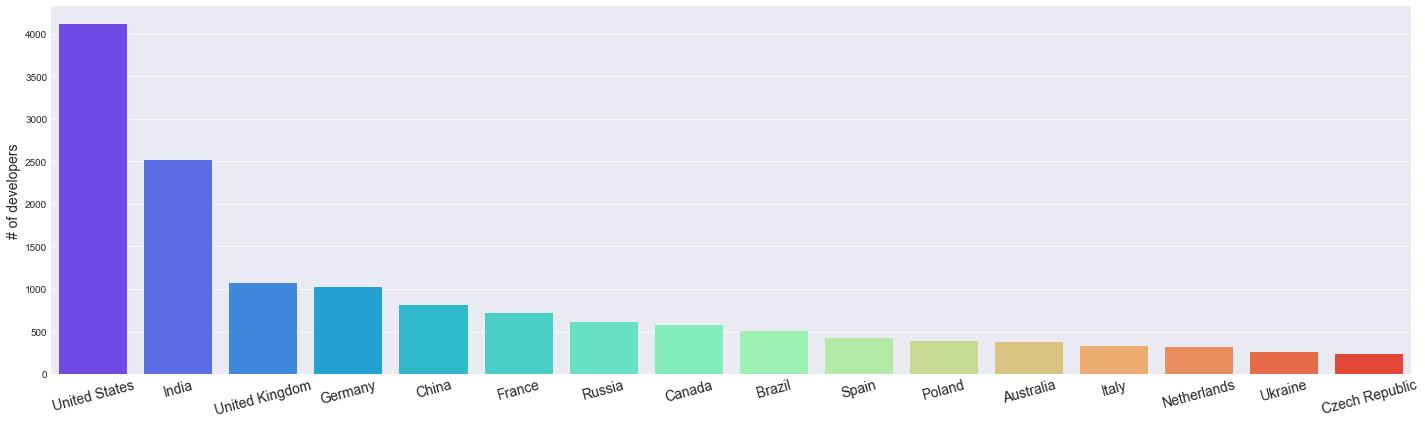

In [113]:
sns.countplot(countries, order=countries.value_counts().index, palette=sns.color_palette('rainbow', 16))
plt.xlim(xmax=15.5);
# plt.xlabel('国家', fontsize=18, fontproperties=chinese);
# plt.ylabel('频数', fontsize=18, fontproperties=chinese);
plt.xticks(fontsize=14, rotation=15);
plt.xlabel('')
plt.ylabel('# of developers', fontsize=14)
plt.tight_layout()
plt.savefig('country-counts.png')

In [115]:
countries_pyver = pd.crosstab(index=countries, columns=python_version)
countries_pyver.head()

which version of python do you use the most?,Python 2,Python 3
what country do you live in?,,
Afghanistan,4,9
Albania,1,11
Algeria,3,31
Andorra,2,6
Angola,1,2


In [116]:
top10_countries = countries_pyver.loc[countries.value_counts()[:10].index]
top10_countries = top10_countries.div(top10_countries.sum(axis=1), axis=0)
top10_countries

which version of python do you use the most?,Python 2,Python 3
United States,0.186182,0.813818
India,0.168849,0.831151
United Kingdom,0.166667,0.833333
Germany,0.126531,0.873469
China,0.146814,0.853186
France,0.172911,0.827089
Russia,0.097173,0.902827
Canada,0.181818,0.818182
Brazil,0.112766,0.887234
Spain,0.179612,0.820388


In [117]:
df = top10_countries.stack().reset_index()
df.columns = ['country', 'pyver', 'value']
df.head()

,country,pyver,value
0,United States,Python 2,0.186182
1,United States,Python 3,0.813818
2,India,Python 2,0.168849
3,India,Python 3,0.831151
4,United Kingdom,Python 2,0.166667


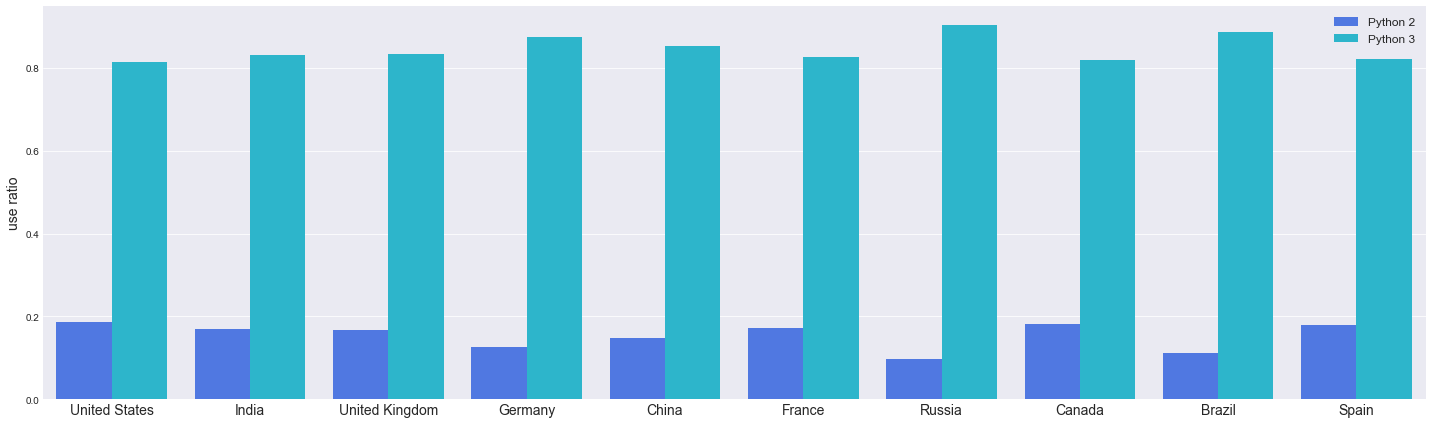

In [118]:
sns.barplot(x='country', y='value', hue='pyver', data=df, palette=sns.color_palette('rainbow'))
plt.xticks(fontsize=14)
plt.xlabel('')
plt.ylabel('use ratio', fontsize=14)
plt.legend(title=None, fontsize=12)
plt.tight_layout()
plt.savefig('country-pyver.png')

In [119]:
countries_pyver_ratio = countries_pyver.div(countries_pyver.sum(axis=1), axis=0)
countries_pyver_ratio.head()

which version of python do you use the most?,Python 2,Python 3
what country do you live in?,,
Afghanistan,0.307692,0.692308
Albania,0.083333,0.916667
Algeria,0.088235,0.911765
Andorra,0.250000,0.750000
Angola,0.333333,0.666667


C:\Users\secsi\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


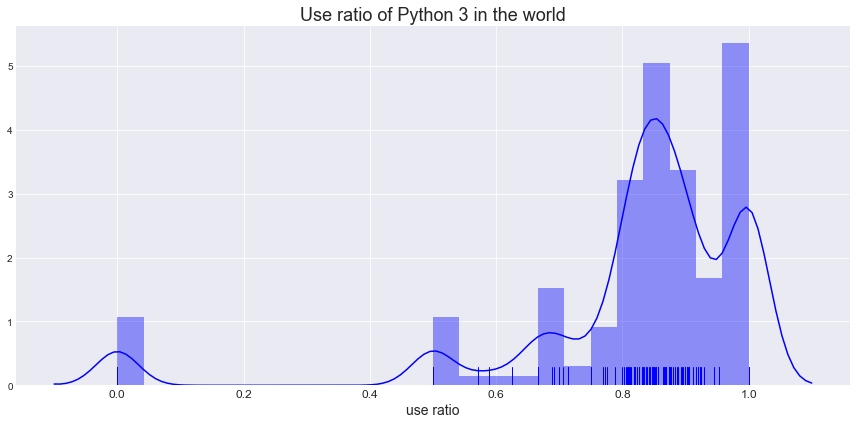

In [120]:
plt.figure(figsize=(12, 6))
sns.distplot(countries_pyver_ratio['Python 3'], rug=True, color='b')
plt.xlabel('use ratio', fontsize=14)
plt.xticks(fontsize=12)
plt.title('Use ratio of Python 3 in the world', fontsize=18)
plt.tight_layout()
plt.savefig('use-ratio-of-python3-world.png')

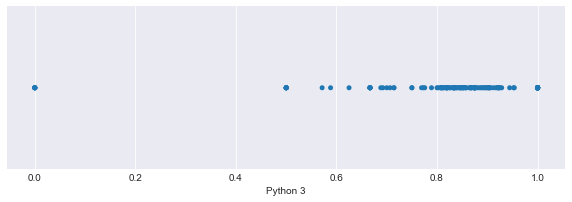

In [121]:
plt.figure(figsize=(10, 3))
sns.stripplot(x='Python 3', data=countries_pyver_ratio)

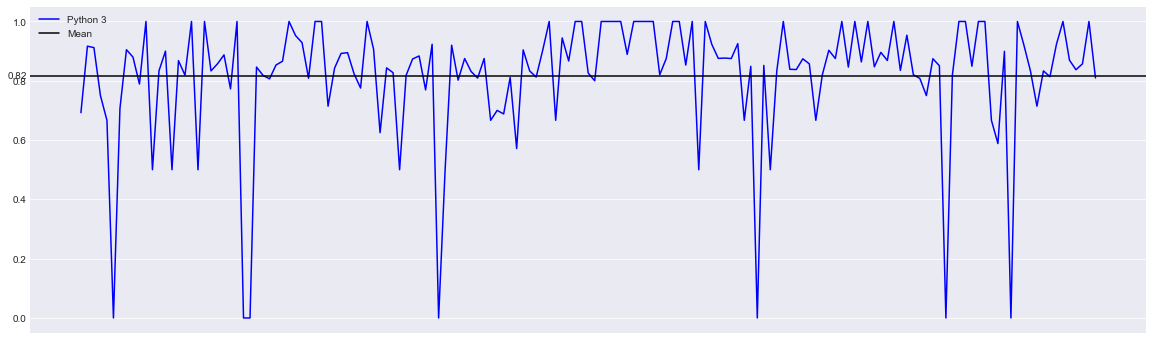

In [122]:
import matplotlib.transforms as transforms
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(countries_pyver_ratio['Python 3'], c='b')
ax.axhline(countries_pyver_ratio['Python 3'].mean(), c='k', label='Mean')
plt.xticks([]);
xmin, _ = plt.xlim()
ax.text(0, countries_pyver_ratio['Python 3'].mean(), round(countries_pyver_ratio['Python 3'].mean(), 2), 
        transform=transforms.blended_transform_factory(ax.get_yticklabels()[0].get_transform(), ax.transData), 
        rotation='horizontal', 
        horizontalalignment='right', 
        verticalalignment='center');
ax.legend()

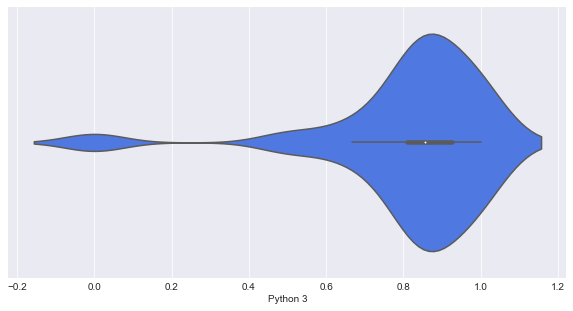

In [123]:
plt.figure(figsize=(10, 5))
sns.violinplot(countries_pyver_ratio['Python 3'], palette=sns.color_palette('rainbow'))

In [124]:
from plotly.offline import iplot, init_notebook_mode

In [128]:
init_notebook_mode(connected=True)

In [129]:
data = [ dict(
        type = 'choropleth',
        locations = countries_pyver_ratio.index,
        locationmode = 'country names', 
        z = countries_pyver_ratio['Python 3'] * 100,
        text = countries_pyver_ratio.index,
        colorscale = 'Set3',
        autocolorscale = False,
        reversescale = True,
        marker = dict(
            line = dict (
                color = 'rgb(180,180,180)',
                width = 0.5
            ) ),
        colorbar = dict(
            autotick = False,
            ticksuffix = '%',
            title = 'Percent'),
      ) ]

layout = dict(
    title = 'Python 3 in the world',
    geo = dict(
        showframe = False,
        showcoastlines = False,
        projection = dict(
            type = 'Mercator'
        )
    )
)

fig = dict( data=data, layout=layout )
iplot(fig, validate=False, filename='Python 3 in the world', image_height=1080, image_width=1920, show_link=False)

### 开发者中使用 IDE 的情况？

In [134]:
cols = find_cols(['what', 'editor'])
main_col = cols[0]
addition_cols = [c for c in cols if not c.startswith('what') and not c.startswith('none')]

In [136]:
editors = survey[addition_cols]
editors.columns = [item.split(':')[0] for item in editors.columns]
editors.head()

,pycharm professional edition,pycharm community edition,sublime text,vim,atom,vs code,eclipse + pydev,aptana,jupyter notebook,intellij idea,...,netbeans,spyder,rodeo,gedit,ninja-ide,komodo editor,komodo ide,wing ide,textmate,other write in
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Text(0.5,1,'What editor(s)/IDE(s) have you considered for use in your Python development?')

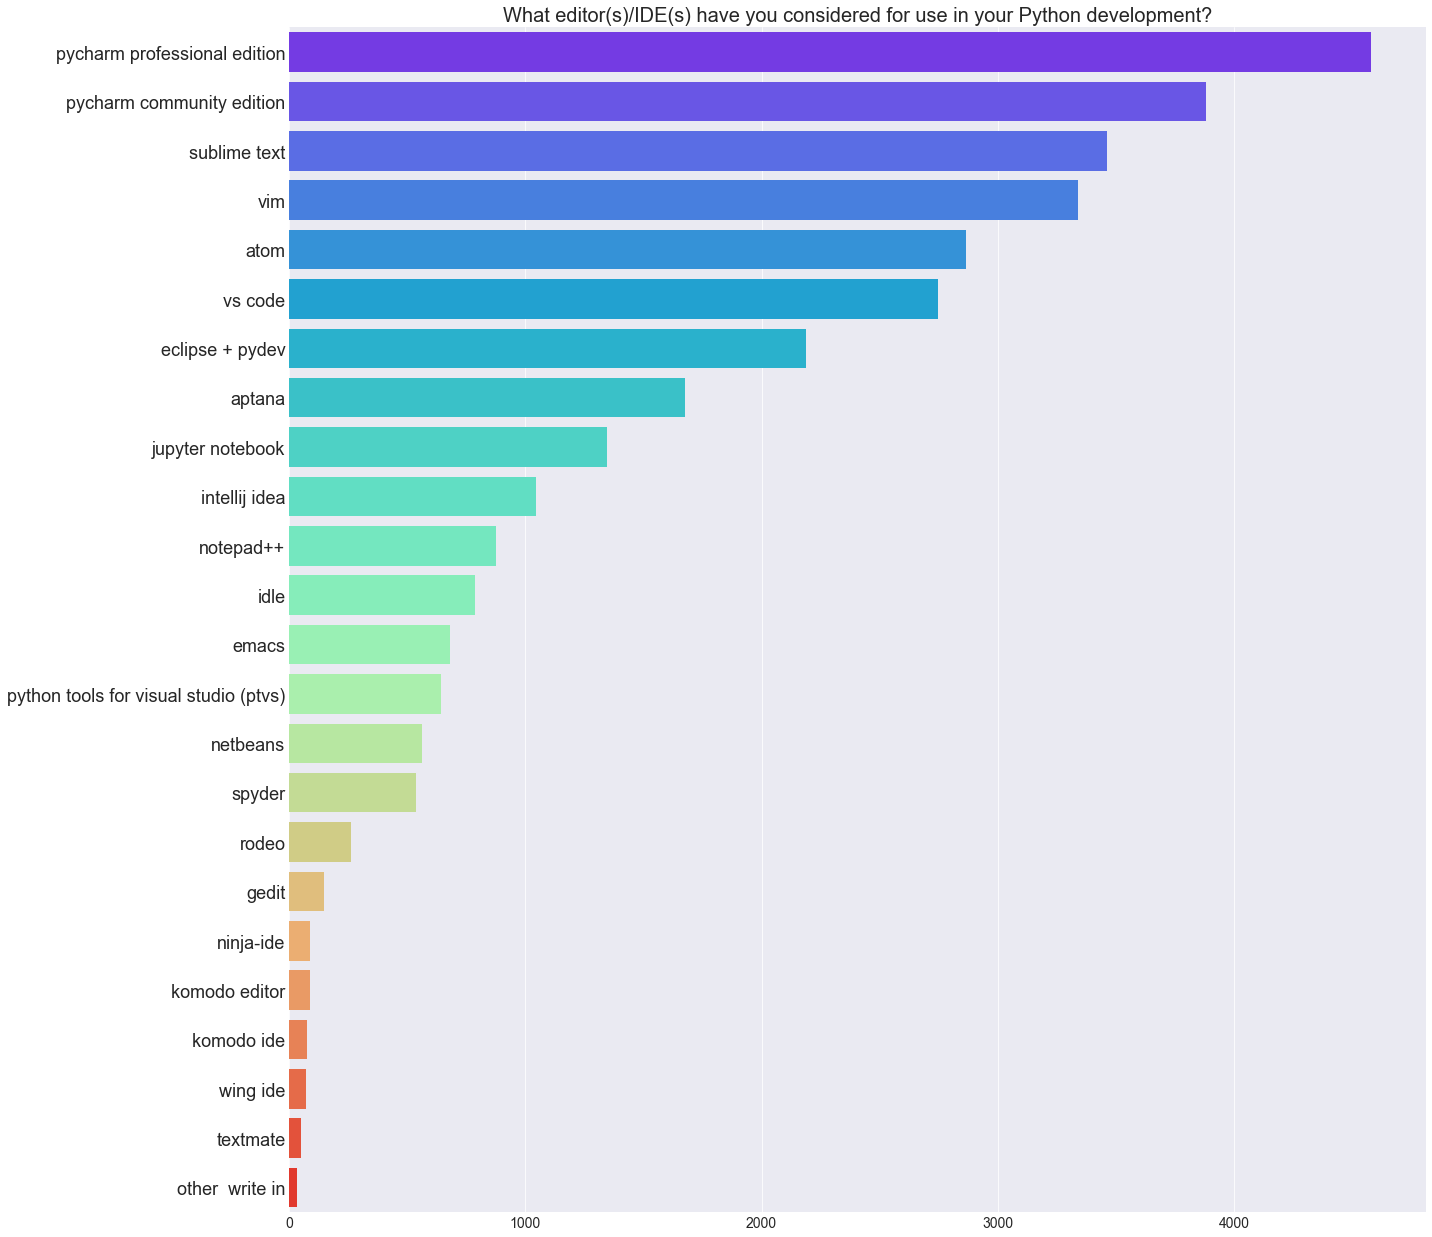

In [137]:
values = editors.count().sort_values(ascending=False).values
labels = editors.columns

plt.figure(figsize=(20, 17))
sns.barplot(x=values, y=labels, orient='h', palette=sns.color_palette("rainbow", len(labels)))
plt.xticks(fontsize=14)
plt.yticks(fontsize=18)
plt.tight_layout()
plt.title('What editor(s)/IDE(s) have you considered for use in your Python development?', fontsize=20)
# plt.savefig('frameworks.png')

In [139]:
main_editor = survey[main_col]
main_editor.head()

0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
Name: what is the main editor you use for your current python development?, dtype: object

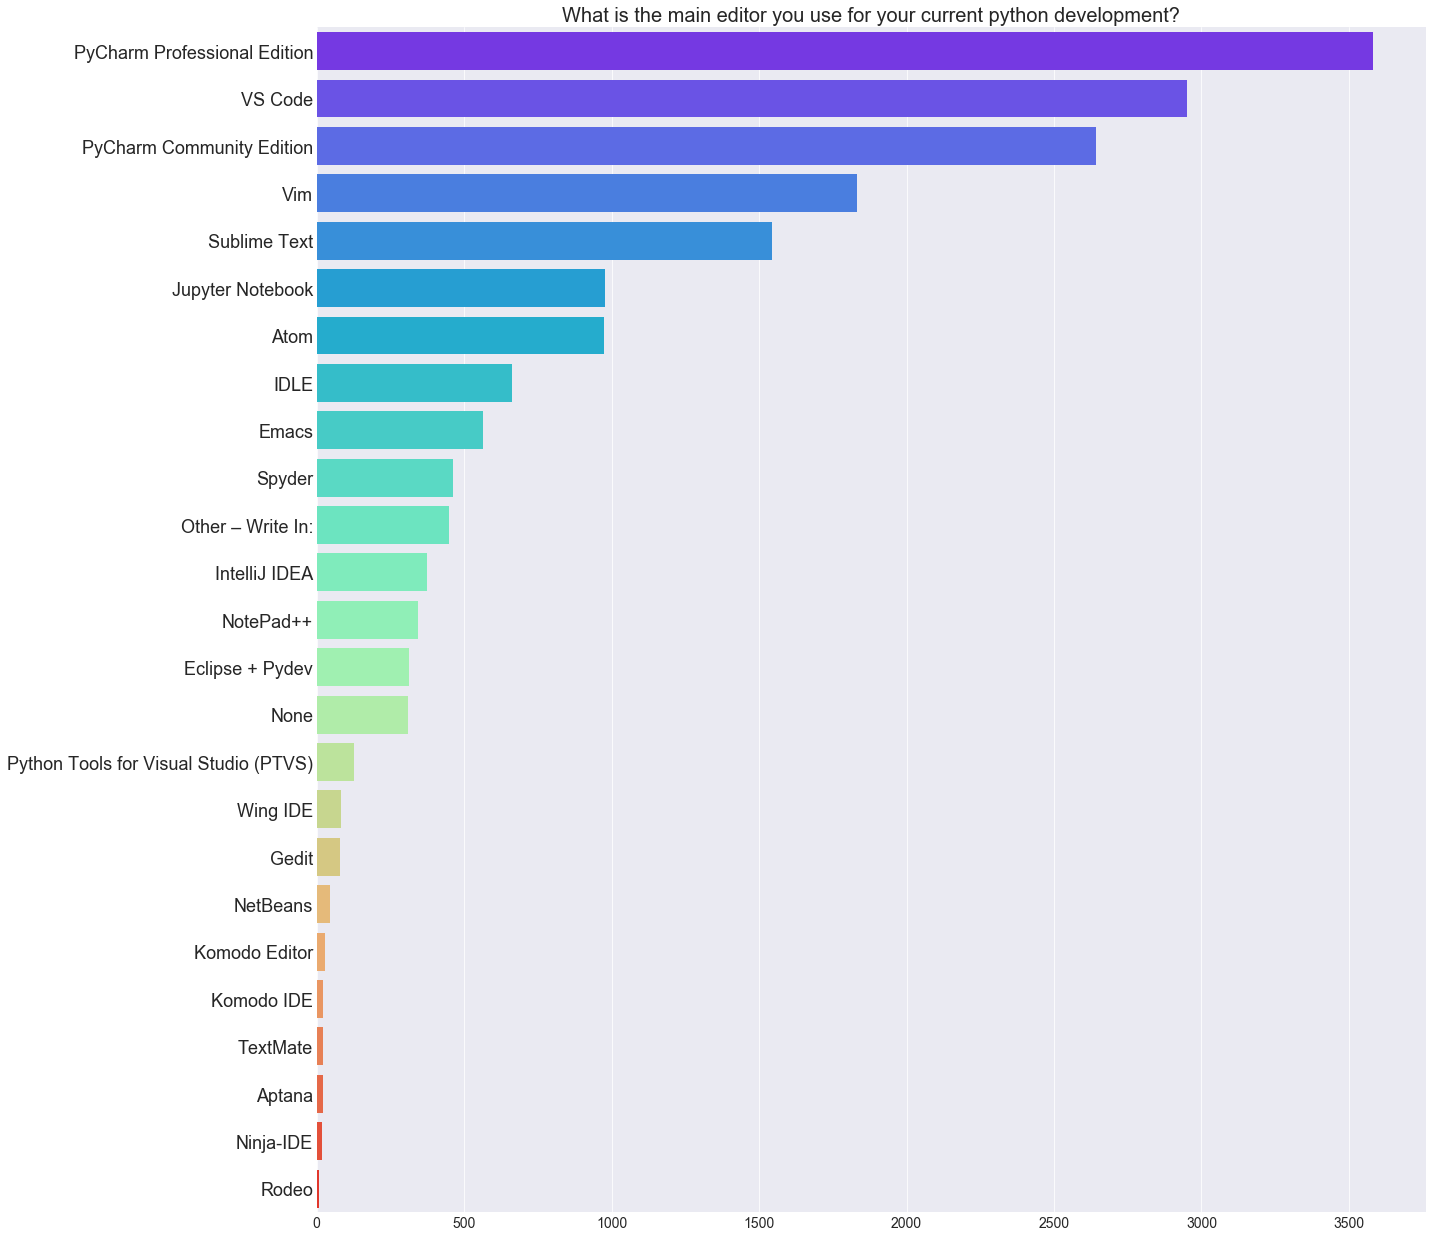

In [140]:
main_editor_sorted = main_editor.value_counts(ascending=False)
values = main_editor_sorted.values
labels = main_editor_sorted.index

plt.figure(figsize=(20, 17))
sns.barplot(x=values, y=labels, orient='h', palette=sns.color_palette("rainbow", len(labels)))
plt.xticks(fontsize=14)
plt.yticks(fontsize=18)
plt.tight_layout()
plt.title('What is the main editor you use for your current python development?', fontsize=20);

## 2019 年问题

### 使用最多的 Python 2/Python 3 版本

In [10]:
cols = find_cols(['which', 'version', 'python', 'use', 'most'])
cols

['which version of python do you use the most?',
 'which version of python 2 do you use the most?',
 'which version of python 3 do you use the most?']

In [11]:
py2 = survey[cols[1]]
py3 = survey[cols[2]]

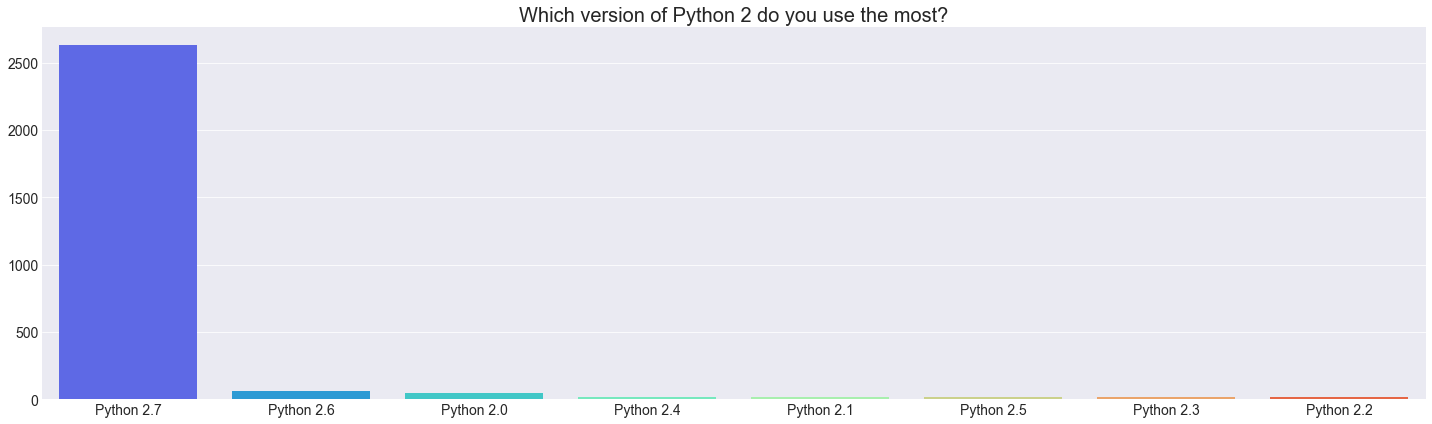

In [29]:
sns.countplot(py2, order=py2.value_counts().index, palette=sns.color_palette("rainbow", 8))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('')
plt.ylabel('')
plt.title('Which version of Python 2 do you use the most?', fontsize=20)
plt.tight_layout()

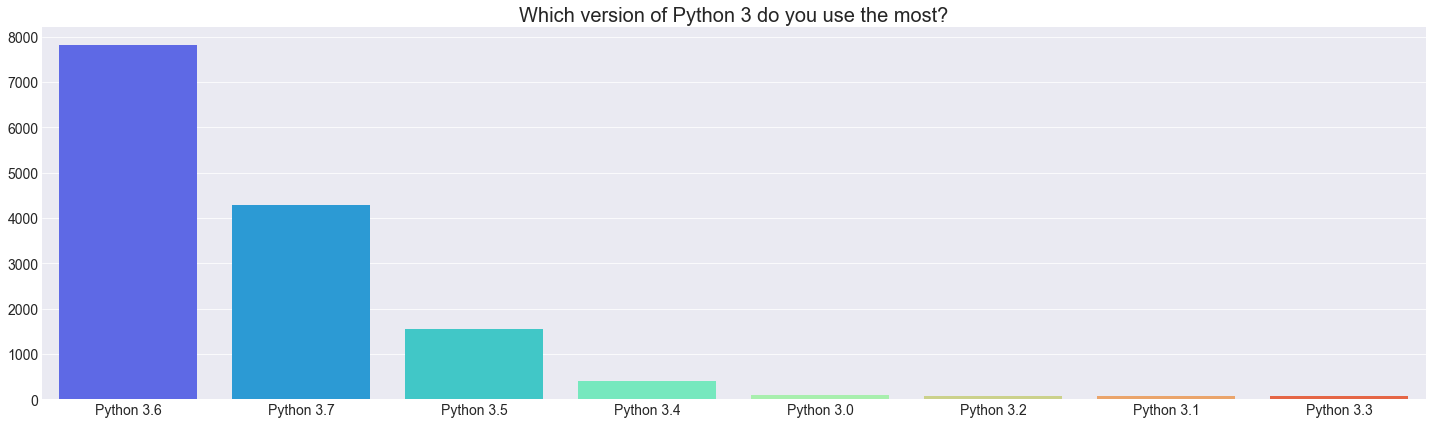

In [30]:
sns.countplot(py3, order=py3.value_counts().index, palette=sns.color_palette("rainbow", 8))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('')
plt.ylabel('')
plt.title('Which version of Python 3 do you use the most?', fontsize=20)
plt.tight_layout()